### 続きをやれる環境作りをしましょう

いつも通りD-Wave Ocean SDKの準備から外部データの読み込み準備までしましょう。

In [ ]:
pip install dwave-ocean-sdk

     |████████████████████████████████| 92kB 7.0MB/s 
     |████████████████████████████████| 788kB 22.0MB/s 
     |████████████████████████████████| 71kB 8.9MB/s 
     |████████████████████████████████| 409kB 42.1MB/s 
     |████████████████████████████████| 7.0MB 40.9MB/s 
     |████████████████████████████████| 798kB 41.6MB/s 
     |████████████████████████████████| 204kB 55.8MB/s 
     |████████████████████████████████| 399kB 43.6MB/s 
     |████████████████████████████████| 92kB 11.5MB/s 
     |████████████████████████████████| 81kB 10.3MB/s 
     |████████████████████████████████| 3.3MB 31.9MB/s 
     |████████████████████████████████| 14.2MB 239kB/s 
     |████████████████████████████████| 1.0MB 28.4MB/s 
  Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4:
      Successfully uninstalled protobuf-3.12.4


復習になりますが、ローカルファイルをGoogle colab上にアップロードして使う方法です。
まず次のようにライブラリを読み込みます。

In [ ]:
from google.colab import files

この後以下のコードを実行するとファイルをアップロードすることができます。
講義時に配布したリンクからダウンロードしたファイルをGoogle colabにアップロードしてください。

In [ ]:
files.upload()

Saving QA4Uafter.csv to QA4Uafter.csv


{'QA4Uafter.csv': b'3.0,3.0,3.0,3.0\n2.0,2.0,3.0,3.0\n4.0,3.0,4.0,5.0\n4.0,3.0,3.0,4.0\n3.0,2.0,3.0,6.0\n3.0,3.0,3.0,5.0\n4.0,1.0,3.0,3.0\n3.0,2.0,2.0,2.0\n4.0,3.0,3.0,4.0\n2.0,3.0,3.0,3.0\n2.0,3.0,4.0,4.0\n4.0,2.0,2.0,4.0\n4.0,3.0,5.0,5.0\n2.0,1.0,2.0,4.0\n3.0,3.0,3.0,4.0\n2.0,2.0,3.0,2.0\n2.0,2.0,3.0,4.0\n2.0,2.0,3.0,3.0\n2.0,1.0,1.0,3.0\n2.0,1.0,3.0,1.0\n4.0,2.0,4.0,4.0\n2.0,1.0,3.0,5.0\n4.0,1.0,5.0,2.0\n2.0,2.0,3.0,1.0\n4.0,1.0,2.0,7.0\n4.0,2.0,3.0,4.0\n4.0,3.0,3.0,5.0\n4.0,1.0,3.0,3.0\n3.0,2.0,3.0,2.0\n4.0,3.0,3.0,5.0\n3.0,2.0,1.0,2.0\n2.0,1.0,3.0,4.0\n2.0,2.0,3.0,5.0\n4.0,2.0,2.0,4.0\n3.0,2.0,3.0,3.0\n4.0,2.0,2.0,1.0\n3.0,3.0,2.0,1.0\n2.0,2.0,3.0,5.0\n4.0,1.0,2.0,1.0\n4.0,3.0,3.0,3.0\n3.0,3.0,3.0,5.0\n3.0,1.0,3.0,5.0\n4.0,3.0,3.0,1.0\n1.0,2.0,1.0,4.0\n2.0,1.0,1.0,3.0\n4.0,1.0,3.0,1.0\n4.0,3.0,3.0,3.0\n4.0,3.0,3.0,4.0\n1.0,1.0,3.0,2.0\n2.0,1.0,2.0,1.0\n2.0,3.0,2.0,4.0\n4.0,2.0,2.0,1.0\n4.0,2.0,3.0,3.0\n2.0,1.0,2.0,5.0\n4.0,3.0,3.0,1.0\n4.0,1.0,2.0,4.0\n2.0,2.0,2.0,2.0\n4.0,3.0,3.0

前回同様に本イベントに参加した皆さんから演習パートに参加したいガチ勢の方々のアンケート結果を利用して、それらの方々の傾向を分析することで得られる**生成モデル**というものをボルツマン機械学習を実行して作りましょう。
先ほどアップロードしたファイルをpandasというライブラリで利用します。

In [ ]:
import pandas as pd
df = pd.read_csv('QA4Uafter.csv',header=None)

ここでdfはデータフレームと呼ばれる形式になっています。
前回同様に私たちが必要なのはcsvに入った数値ですので、次のように操作します。

In [ ]:
import numpy as np
V = df.values.astype(np.int8)
print(V)

[[3 3 3 3]
 [2 2 3 3]
 [4 3 4 5]
 [4 3 3 4]
 [3 2 3 6]
 [3 3 3 5]
 [4 1 3 3]
 [3 2 2 2]
 [4 3 3 4]
 [2 3 3 3]
 [2 3 4 4]
 [4 2 2 4]
 [4 3 5 5]
 [2 1 2 4]
 [3 3 3 4]
 [2 2 3 2]
 [2 2 3 4]
 [2 2 3 3]
 [2 1 1 3]
 [2 1 3 1]
 [4 2 4 4]
 [2 1 3 5]
 [4 1 5 2]
 [2 2 3 1]
 [4 1 2 7]
 [4 2 3 4]
 [4 3 3 5]
 [4 1 3 3]
 [3 2 3 2]
 [4 3 3 5]
 [3 2 1 2]
 [2 1 3 4]
 [2 2 3 5]
 [4 2 2 4]
 [3 2 3 3]
 [4 2 2 1]
 [3 3 2 1]
 [2 2 3 5]
 [4 1 2 1]
 [4 3 3 3]
 [3 3 3 5]
 [3 1 3 5]
 [4 3 3 1]
 [1 2 1 4]
 [2 1 1 3]
 [4 1 3 1]
 [4 3 3 3]
 [4 3 3 4]
 [1 1 3 2]
 [2 1 2 1]
 [2 3 2 4]
 [4 2 2 1]
 [4 2 3 3]
 [2 1 2 5]
 [4 3 3 1]
 [4 1 2 4]
 [2 2 2 2]
 [4 3 3 1]
 [2 2 3 1]
 [2 2 3 4]
 [4 3 3 1]
 [3 2 3 5]
 [2 1 4 1]
 [4 2 5 2]
 [2 2 1 3]
 [4 3 3 1]
 [4 2 2 2]
 [2 1 2 5]
 [4 2 3 3]
 [2 2 3 5]
 [2 2 3 1]
 [4 3 5 3]
 [4 2 3 2]
 [2 2 3 3]
 [4 3 1 1]
 [4 3 3 3]
 [4 3 5 4]
 [3 3 2 2]
 [3 3 3 5]
 [4 3 2 1]
 [4 3 3 5]
 [2 2 1 2]
 [3 3 3 3]
 [2 1 2 3]
 [2 1 2 5]
 [3 3 2 1]
 [1 1 3 5]
 [4 2 2 2]
 [4 3 3 3]
 [4 2 2 4]
 [1 1 3 4]

Vに読み込んだデータを行列として格納しました。
どのようなサイズのデータかを調べるためには.shapeを利用しましょう。

In [ ]:
N,M = V.shape
print(N,M)

246 4


これによると241人分のデータで、4項目のデータが格納されているということがわかります。
実際それぞれ4項目、つまり4列の数値が並んでいると思います。
これは事前に取ったアンケートの結果の数値となっています。

### one-hot表示

ここで復習となりますが、one-hot表示を利用しましょう。
複数の要素があり、どれが利用されているかを0と1で示すものです。
例えば3は$(0,0,1,0,\ldots)$と3番目に1が立ち、2は$(0,1,0,0,\ldots)$と2番目に1が立ちます。
そのようなベクトルを用意すると、内積という計算で**同じかどうか**がわかります。
内積という計算は、各成分をかけて足し上げるということになっています。
3と2の場合は、
\begin{equation}
0 \times 0 + 0 \times 1 + 1 \times 0 + 0 \times 0 +\ldots = 0
\end{equation}
となります。3と3であれば
\begin{equation}
0 \times 0 + 0 \times 0 + 1 \times 1 + 0 \times 0 +\ldots = 1
\end{equation}
となります。これで同じかどうかを示すことができそうです。

今回のアンケートでは、4つの項目があり、それぞれ4,3,5,7個の選択肢から答えを選んでもらいました。
それぞれ4つのうち1個が、3つのうち1個が、5つのうち1個が、７つのうち1個が1を取り、それ以外全て0となっているようなデータに加工すると都合がよさそうです。




その加工のために次のような関数を作ります。
実は関数というのは自分で作り出すことができます。def 関数名（引数名）:として、その中でどんな計算を実行するのか、自由に書くことができます。
最後に結果を返すreturnで計算結果を出すようにもできます。

In [ ]:
def onehot(data):
  z = np.zeros(4+3+5+7)
  z[data[0]-1] = 1
  z[4+data[1]-1] = 1
  z[4+3+data[2]-1] = 1
  z[4+3+5+data[3]-1] = 1
  return z

この関数を利用すると、加工されたデータのベクトルが出力されますので、一個ずつデータを加工していきましょう。

In [ ]:
M = 4+3+5+7
Z = np.zeros(N*M).reshape(N,M)

for i in range(N):
  Z[i,:] = onehot(V[i,:])

これで加工終了です。

### ボルツマンマシン学習

こうして用意されたアンケートデータを利用して新しいことを学んでいきましょう。
ボルツマン機械学習（ボルツマンマシン学習）です。
大胆な仮説ですが、このアンケートデータを、**量子アニーリングマシンからの出力結果**であると考えてみましょう。
アンケートの項目が$4$つあり、それぞれ$4,3,5,7$個の選択肢のうち、どれかが$1$となるという条件があります。
$0$と$1$をとる変数の数は$M=4+3+5+7$で、それぞれ次のような制約条件があります。

第一項目について
\begin{equation}
x_1+x_2+x_3+x_4 = 1
\end{equation}
第二項目について
\begin{equation}
x_5+x_6+x_7 = 1
\end{equation}
第三項目については
\begin{equation}
x_8+x_9+x_{10}+x_{11}+x_{12} = 1
\end{equation}
第四項については
\begin{equation}
x_{13}+x_{14}+x_{15}+x_{16}+x_{17}+x_{18}+x_{19} = 1
\end{equation}
といった格好です。

この条件を満たしつつ、$x_i$にはどのような関係があるのでしょうか。
例えば1つ目の項目は学生か社会人かなどの所属についての項目です。
それと他の項目にはどのような相関があるのでしょうか。
学生に多い傾向と、社会人に多い傾向などは見つかったりするのでしょうか。

QUBO行列は、何度か登場してきたように最適化問題を解くために問題を指定するものでした。
その際には次のようなコスト関数を最小化するということを量子アニーリングマシンにお願いをする格好でした。
\begin{equation}
E({\bf x}) = \sum_{i}\sum_{j} Q_{ij} x_i x_j
\end{equation}
これでわかることは$Q_{ij}$を大きくすると、$x_ix_j$は$0$になりがちです。
逆に$Q_{ij}$を小さくすると、$x_ix_j$は$1$になる傾向が強まります。
この$Q_{ij}$を微調整することで、僕らが持っているデータを再現するように$Q_{ij}$を作り出すことはできないでしょうか。
それができてしまえば、**参加者の傾向を真似した**量子アニーリングマシンが出来上がるということになります。
こうやって実際の傾向を表すデータと、人工的に用意したモデルの傾向から出てくる結果を、調整して合わせることにより、真似をすることを**機械学習**と言います。
今回はそのなかでもボルツマンマシン学習を取り扱っています。

特に量子アニーリングマシンは、その内部的な事情からボルツマン分布という特殊な確率分布に従う傾向にあるということが、いくつかの研究・調査により明らかとなりました。
その性質を逆手に利用して、ボルツマンマシン学習に利用しようという研究が実施されています。




量子アニーリングマシンからはnum_readsを調整することにより、$x_ix_j$を大量に出力することができます。
それに対して私たちは実際のデータを、$Z_{im}$という形で持っています。
このとき$i$は$i$番目の人の結果でしたから、何度かデータを出力してもらったうちの1つであると考えます。そして$m$は、ここでいう、どの項目に$1$が立っているかということを示しています。
それに合わせて添字を書きます。
さらに先ほど考えたように、各項目においては制約条件がありますから、罰金法を利用して、
\begin{equation}
E({\bf x}) = \sum_{m}\sum_{n} Q_{mn} x_{m} x_{n} + \lambda_1\left( x_1+x_2+x_3+x_4 -1 \right)^2 + \lambda_2 \left( x_5+x_6+x_7 -1 \right)^2 + \lambda_3 \left( x_8+x_9+x_{10}+x_{11}+x_{12} - 1\right)^2 + \lambda_4 \left( x_{13}+x_{14}+x_{15}+x_{16}+x_{17}+x_{18}+x_{19} - 1\right)^2
\end{equation}
というQUBO行列、ないしはコスト関数が対応します。
これを量子アニーリングマシンに実装して、同じように出力しましょう。
そうすると$x_m$に対してはいくつかの結果が得られます。
何番目の結果であるのかという添字を追加しましょう。
$x_{im}$とします。
そうすると実際のデータは$Z_{im}$で、仮に量子アニーリングマシンから出力した結果は$x_{im}$ということで
比較しやすいものとなりました。



この結果を利用して、$Q_{mn}$をどのように調整したら良いのかを考えてみましょう。
$Q_{mn}$を上下させることによって$x_mx_n$を大きくしたり、小さくしたりさせることができます。
$Z_{im}$と比較して$x_{im}$が小さいときには、$x_{im}$を大きくさせましょう。そのためには$Q_{mn}$を小さくします。
逆に$Z_{im}$と比較して$x_{im}$が大きいときには、$x_{im}$を小さくさせましょう。そのためには$Q_{mn}$を大きくしましょう。
比較をするためには引き算をすれば良いですね。たくさんのデータ、たくさんの出力結果が集まっていますから、それらの平均を利用することにしましょう。



\begin{equation}
Q_{mn} = Q_{mn} - \eta\left( \frac{1}{N}\sum_{i=1}^N Z_{im}Z_{in} - \frac{1}{N'} \sum_{i=1}^{N'} x_{im}x_{in}\right)
\end{equation}
ここで$N'$は量子アニーリングマシンから出力してもらう数です。$\eta$はイータ（エータ）などと読むギリシャ文字ですが、学習率または勾配率などと呼ばれており、微調整をする程度を示します。
$Q_{mn}$を$Z_{im}$と$x_{im}$の平均値の比較をして、その結果に応じて微調整をするということになります。

これを実際に実装してみましょう。
まずは量子アニーリングマシンに投入するQUBO行列のうち制約条件に関連する部分を作りましょう。

In [ ]:
Qc = np.zeros(M**2).reshape(M,M)

lam = 10.0

for m in range(4):
  for n in range(4):
    Qc[m,n] = Qc[m,n] + lam
    if m == n:
      Qc[m,n] = Qc[m,n] -2*lam

for m in range(4,4+3):
  for n in range(4,4+3):
    Qc[m,n] = Qc[m,n] + lam
    if m == n:
      Qc[m,n] = Qc[m,n] -2*lam

for m in range(4+3,4+3+5):
  for n in range(4+3,4+3+5):
    Qc[m,n] = Qc[m,n] + lam
    if m == n:
      Qc[m,n] = Qc[m,n] -2*lam

for m in range(4+3+5,4+3+5+7):
  for n in range(4+3+5,4+3+5+7):
    Qc[m,n] = Qc[m,n] + lam
    if m == n:
      Qc[m,n] = Qc[m,n] -2*lam


それぞれの制約条件についての項目を足し上げました。
うまくできたかな？とみたい場合にはprint()やmatplotlib.pyplotからimshow()などを利用しましょう。

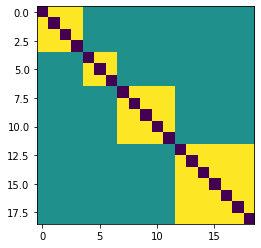

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(Qc)
plt.show()

対角項（左上から右下に斜め）には$-2\lambda$が、非対角項のうちブロック上に$\lambda$が各項目の選択肢ごとに埋まっていればOKです。

さて最初$Q_{m,n}$は幾つなのか分かりませんので適当な数値を入れておきましょう。
制約条件を満たした答えが出るのを妨げないために最初は$0$にしておきます。

In [ ]:
Q = np.zeros(M**2).reshape(M,M)
Qmat = Q+Qc

これでQUBO行列の準備は終えました。
量子アニーリングマシンを使う準備を整えましょう。
今回は全結合（全てのビットが関係しうる）の埋め込みを利用します。
まずはいつもの通り量子アニーリングマシンの利用の準備を整えます。

In [ ]:
token = '**'
endpoint = 'https://cloud.dwavesys.com/sapi/'

from dwave.system import DWaveCliqueSampler
sampler = DWaveCliqueSampler(solver='DW_2000Q_6',token=token)

In [ ]:
Nsample = 100
sampleset = sampler.sample_qubo(Qmat,num_reads=Nsample, answer_mode = "raw")

ここまでで結果の取得ができました。
answer_modeで"raw"というオプションを利用しましたが、これは生データを渡すということです。
デフォルトではanswer_mode="histogram"となっており、同じ結果が出てきた場合は、その頻度を示すデータに整形してくれています。

この結果を計算に利用しやすいように整形します。

In [ ]:
x = np.zeros(Nsample*M).reshape(Nsample,M)
for k in range(Nsample):
  x[k,:] = sampleset.record[k][0]

この形は先ほど利用したZと同じ構造をしています。つまり$Z_{i,m}$ですね。

誰が、どんな結果を出したかという格好になっています。
$x_{i,m}$についても$Z_{i,m}$と同じように平均の計算をしましょう。

In [ ]:
Zmat = np.dot(Z.T,Z)/N
Xmat = np.dot(x.T,x)/Nsample

この結果を比較して、先ほど用意した計算式通りにコードを組みます。

In [ ]:
eta = 0.1
Q = Q - eta*(Zmat-Xmat)
Qmat = Q + Qc

この結果を調べるには次のように行列を画像で表示すると良いでしょう。

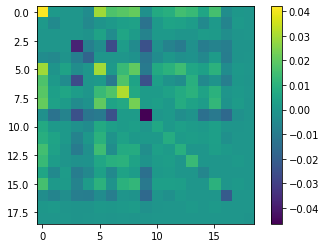

In [ ]:
plt.imshow(Q)
plt.colorbar()
plt.show()

一度だけの結果では、真似をするには限界がありますので、
これを繰り返します。
量子アニーリングマシンにQUBO行列を渡して、
Qの更新を繰り返すようにfor文を利用してみましょう。

毎回毎回更新された様子を見るためにclear_outputを利用して、出力結果のアニメーションを実行します。

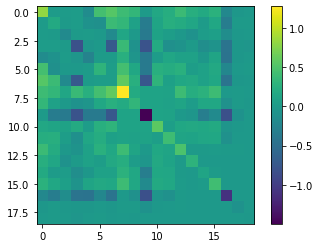

In [ ]:
from IPython.display import clear_output

Tall = 50
for t in range(Tall):
  sampleset = sampler.sample_qubo(Qmat,num_reads=Nsample, answer_mode = "raw")
  x = np.zeros(Nsample*M).reshape(Nsample,M)
  for k in range(Nsample):
    x[k,:] = sampleset.record[k][0]
  Xmat = np.dot(x.T,x)/Nsample
  Q = Q - eta*(Zmat-Xmat)
  Qmat = Q + Qc

  clear_output(True)
  plt.imshow(Q)
  plt.colorbar()
  plt.show()


例えば最初の項目で選択肢1番を答えた人は
次の項目でどんな選択肢を選ぶ傾向にあるのかを調べてみましょう。
Q[0,k]を見ることで調べることができます。

In [ ]:
print(Q[0,4],Q[0,5],Q[0,6],Q[0,7])

-0.1490243902439025 0.44807317073170677 0.5425365853658537 0.4043414634146347


最初の選択肢に負の数で大きさの大きなものが登場します。
$Q_{mn}$が負の数ですから$x_mx_n=1$になる傾向があるということで、
最初の選択肢を答える傾向にあるということがわかります。

次に最初の項目で選択肢2番を答えた人は、どうでしょうか。

In [ ]:
print(Q[1,4],Q[1,5],Q[1,6],Q[1,7])

-0.08809756097560975 -0.10221951219512196 0.3956097560975612 0.33907317073170706


次の項目では最初だけでなく２番目の選択肢も選ぶ傾向にあるようです。

最初の選択肢で選択肢3番を選んだ人は次のようになります。

In [ ]:
print(Q[2,4],Q[2,5],Q[2,6],Q[2,7])

0.018341463414634145 -0.012585365853658527 -0.16717073170731714 0.14426829268292685


こちらは$3$番目の選択肢を選ぶ傾向にあります。

最後に選択肢4番を選んだ人は次の通り。

In [ ]:
print(Q[3,4],Q[3,5],Q[3,6],Q[3,7])

-0.03882926829268289 -0.0109512195121951 -0.7186829268292686 0.385073170731707


おお、３番目の選択肢を選ぶ傾向にありますね。
このようにアンケート結果を反映した$Q_{ij}$を知ることができ、データの分析に利用することもできます。
また量子アニーリングマシンからは、元にしたデータに似たような傾向を示すものを出力させることができます。
そうした人工の生成モデルを作ることがボルツマンマシンでできるようになります。
そのボルツマンマシンから人工データを生成するためには通常マルコフ連鎖モンテカルロ法などの手法を適用して計算をする必要があるのですが、その代わりを量子アニーリングマシンが担うことも可能です。